# Importing Libraries

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [256]:
df1 = pd.read_csv('C:\\Users\\91630\\Downloads\\Churn_Modelling.csv')
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [257]:
df1.shape

(10000, 14)

In [258]:
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [259]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Preprocessing

In [260]:
selected_columns = ["CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Exited"]

In [261]:
df = df1[selected_columns]

In [262]:
df.shape

(10000, 11)

In [263]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [265]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [266]:
df.duplicated().sum()

0

In [267]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [268]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

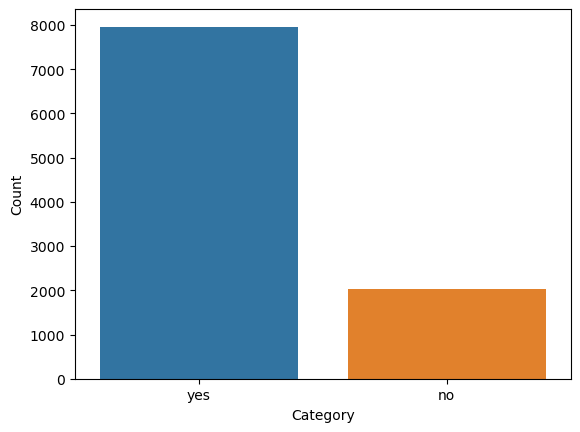

In [269]:
m = sns.countplot(x=df['Exited'])
m.set_xticklabels(['yes', 'no'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

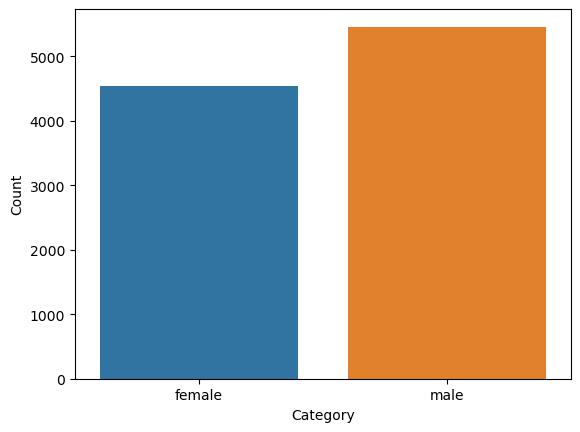

In [270]:
m = sns.countplot(x = df["Gender"])
m.set_xticklabels(['female', 'male'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

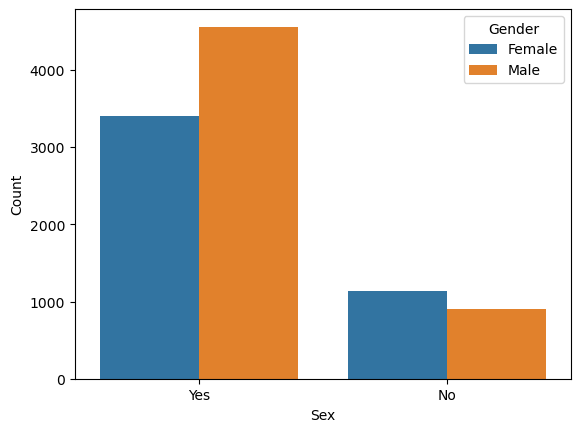

In [271]:
ax = sns.countplot(x = df["Exited"], hue = df["Gender"])
ax.set_xticklabels(['Yes', 'No'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

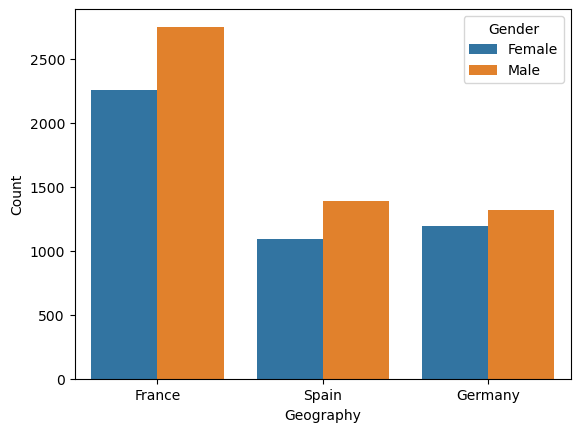

In [273]:
ax = sns.countplot(x = df["Geography"], hue = df["Gender"])
plt.xlabel("Geography")
plt.ylabel("Count")
plt.show()

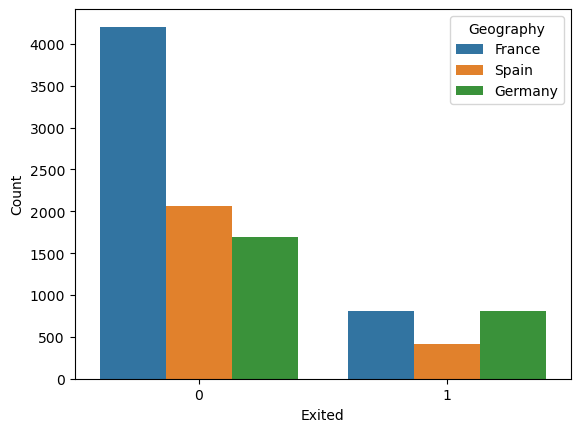

In [274]:
sns.countplot(x = df["Exited"], hue = df["Geography"])
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()

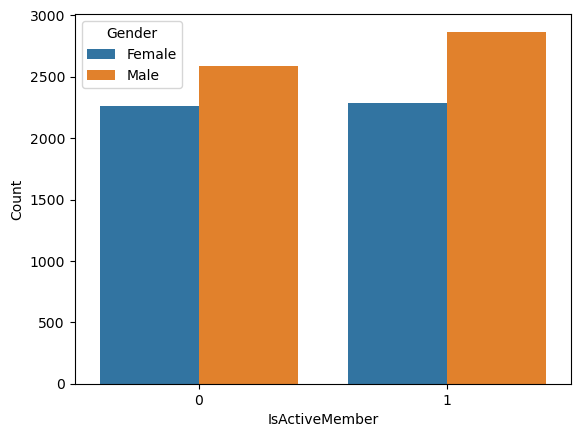

In [275]:
sns.countplot(x = df["IsActiveMember"], hue = df["Gender"])
plt.xlabel("IsActiveMember")
plt.ylabel("Count")
plt.show()

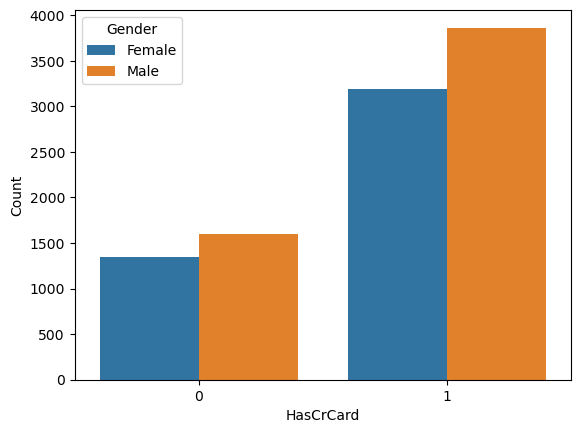

In [276]:
sns.countplot(x = df["HasCrCard"], hue = df["Gender"])
plt.xlabel("HasCrCard")
plt.ylabel("Count")
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'


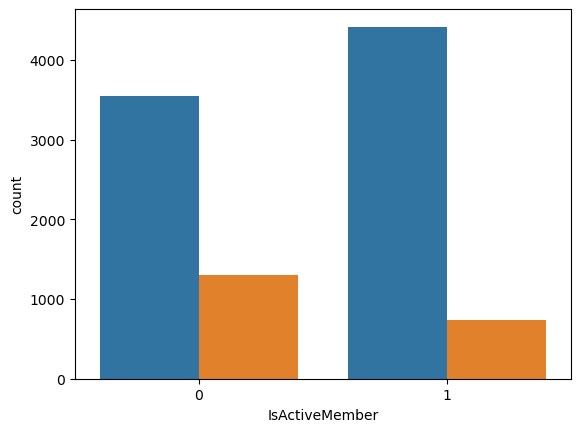

In [277]:
try:
    sns.countplot(x=df["IsActiveMember"], hue=df["Exited"])
except AttributeError as e:
    print(f"AttributeError: {e}")

except AttributeError as e:
    if "'numpy.int64' object has no attribute 'startswith'" in str(e):
        print("Handled AttributeError: Non-string data encountered.")
    else:
        raise  # Reraise the exception if it's not the expected one


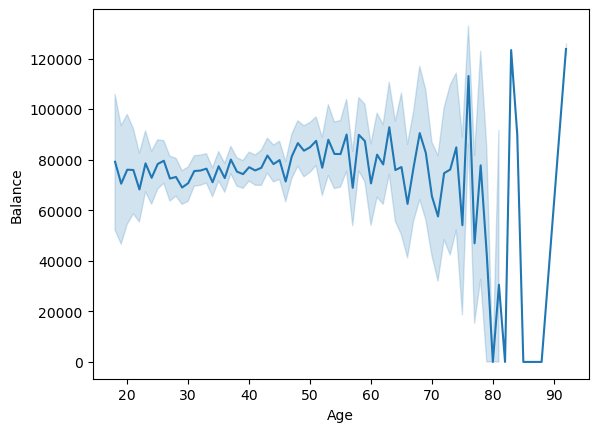

In [278]:
sns.lineplot(x = df["Age"], y = df["Balance"])
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

In [112]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [113]:
df["Gender"] = encoder.fit_transform(df["Gender"])
df["Geography"] = encoder.fit_transform(df["Geography"])

In [116]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [117]:
df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1
9999,792,0,0,28,4,130142.79,1,1,0,38190.78,0


In [114]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


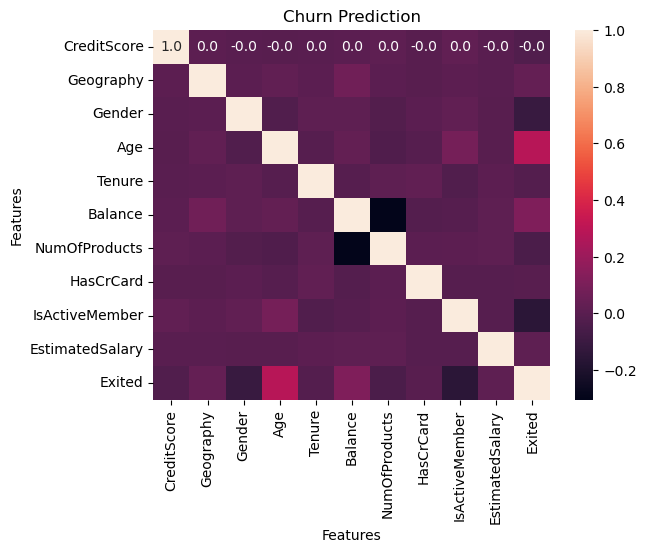

In [115]:
sns.heatmap(df.corr(), annot = True, fmt='.1f')
plt.title("Churn Prediction")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

# Feature Engineering

In [118]:
X = df.drop("Exited", axis=1)
y = df["Exited"]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [119]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [121]:
X_scaled[:, 1:2]

array([[-0.90188624],
       [ 1.51506738],
       [-0.90188624],
       ...,
       [-0.90188624],
       [ 0.30659057],
       [-0.90188624]])

# Balancing the dataset using smote library

In [122]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

Text(0, 0.5, 'Count')

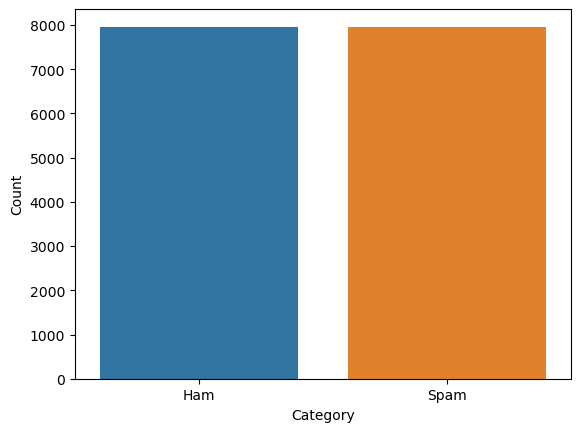

In [123]:
ax = sns.countplot(x = y_resampled)
ax.set_xticklabels(['Ham', 'Spam'])
plt.xlabel('Category')
plt.ylabel('Count')

# Splitting dataset into input and output features

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=2)

In [125]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12740, 10), (3186, 10), (12740,), (3186,))

# Logistic Regression

In [219]:
model = LogisticRegression()

In [220]:
model.fit(X_train, y_train)

LogisticRegression()

In [221]:
y_prediction = model.predict(X_test)
accuracy_score(y_test, y_prediction)

0.6983678593848085

In [222]:
y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred)

0.7065934065934066

In [223]:
confusion_matrix(y_prediction, y_test)

array([[1141,  500],
       [ 461, 1084]], dtype=int64)

<Axes: >

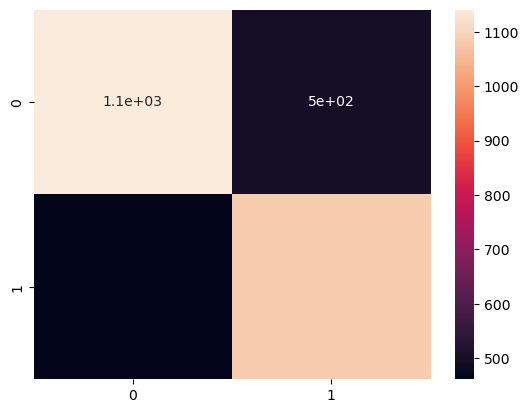

In [224]:
sns.heatmap(confusion_matrix(y_prediction, y_test), annot = True)

In [130]:
model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Random Forest Classifier

In [131]:
model1 = RandomForestClassifier()

In [132]:
model1.fit(X_train, y_train)

RandomForestClassifier()

In [135]:
y_pred1 = model1.predict(X_test)
accuracy_score(y_test, y_pred1)

0.8983050847457628

In [137]:
y_pred = model1.predict(X_train)
accuracy_score(y_train, y_pred)

1.0

In [227]:
confusion_matrix(y_pred1, y_test)

array([[1458,  180],
       [ 144, 1404]], dtype=int64)

<Axes: >

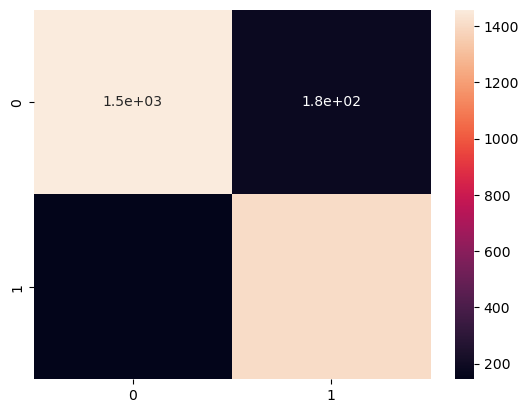

In [226]:
sns.heatmap(confusion_matrix(y_pred1, y_test), annot = True)

In [138]:
model1.predict(X_test)

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [139]:
model1.predict([[850,2,0,43,2,125510.82,1,1,1,79084.10]])

array([0], dtype=int64)

# Gradient Boosting Classifier

In [232]:
model2 = GradientBoostingClassifier()

In [233]:
model2.fit(X_train, y_train)

GradientBoostingClassifier()

In [236]:
y_pred2 = model2.predict(X_test)
accuracy_score(y_test, y_pred2)

0.864406779661017

In [235]:
y_pred = model2.predict(X_train)
accuracy_score(y_train, y_pred)

0.8681318681318682

In [237]:
confusion_matrix(y_pred2, y_test)

array([[1420,  250],
       [ 182, 1334]], dtype=int64)

<Axes: >

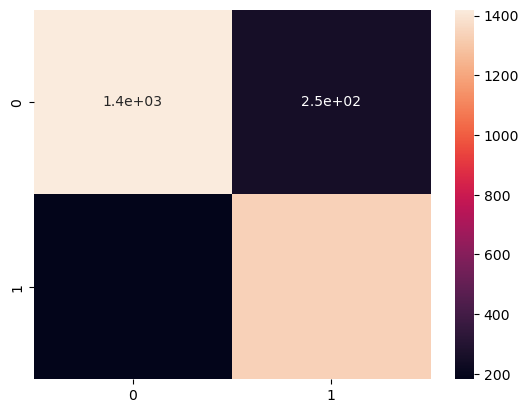

In [238]:
sns.heatmap(confusion_matrix(y_pred2, y_test), annot = True)

# After hyperparameter tuning

# logistic regression after hyperparameter tuning

In [159]:
model = LogisticRegression(solver='liblinear', random_state=42)

In [171]:
param_dist = {
    'C': uniform(loc=0, scale=4),
    'penalty': ['l2']  # Only 'l2' penalty is compatible with 'lbfgs' solver
}

In [172]:
random_search1 = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

In [173]:
random_search1.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(random_state=42,
                                                solver='liblinear'),
                   n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000204B9B0A610>,
                                        'penalty': ['l2']},
                   random_state=42, scoring='accuracy')

In [174]:
random_search1.best_score_

0.7062794348508634

In [175]:
random_search1.best_params_

{'C': 0.08233797718320979, 'penalty': 'l2'}

In [182]:
random_model1 = LogisticRegression(C= 0.08233797718320979, penalty= 'l2')

In [183]:
random_model1.fit(X_train, y_train)

LogisticRegression(C=0.08233797718320979)

In [240]:
y_prediction1 = random_model1.predict(X_test)
accuracy_score(y_test, y_prediction1)

0.6980539861895794

In [241]:
y_pred = random_model1.predict(X_train)
accuracy_score(y_train, y_pred)

0.7065149136577707

In [242]:
confusion_matrix(y_prediction1, y_test)

array([[1141,  501],
       [ 461, 1083]], dtype=int64)

<Axes: >

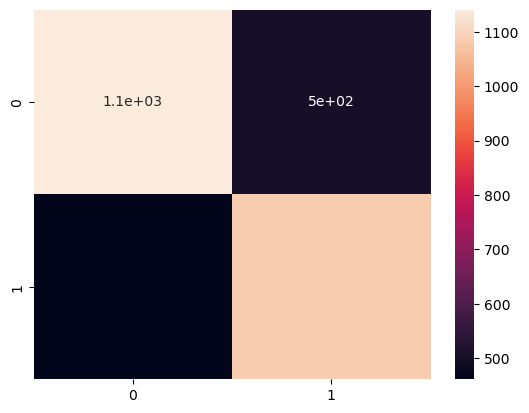

In [243]:
sns.heatmap(confusion_matrix(y_prediction1, y_test), annot = True)

# Random Forest Classifier after hyperparameter tuning

In [147]:
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

In [149]:
random_search = RandomizedSearchCV(model1, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

In [150]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000204B9AEFD90>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000204B9715850>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000204B9AD1690>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000204B9ADA610>},
                   random_state=42, scoring='accuracy')

In [154]:
random_search.best_score_

0.8811616954474097

In [151]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 18,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 11,
 'n_estimators': 139}

In [155]:
random_model = RandomForestClassifier(bootstrap= False,
 max_depth= 18,
 max_features= 'log2',
 min_samples_leaf= 2,
 min_samples_split= 11,
 n_estimators= 139)

In [156]:
random_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=18, max_features='log2',
                       min_samples_leaf=2, min_samples_split=11,
                       n_estimators=139)

In [157]:
x_pred = random_model.predict(X_test)
accuracy_score(y_test, x_pred)

0.8888888888888888

In [158]:
y_pred = random_model.predict(X_train)
accuracy_score(y_train, y_pred)

0.9805337519623234

In [244]:
confusion_matrix(x_pred, y_test)

array([[1444,  196],
       [ 158, 1388]], dtype=int64)

<Axes: >

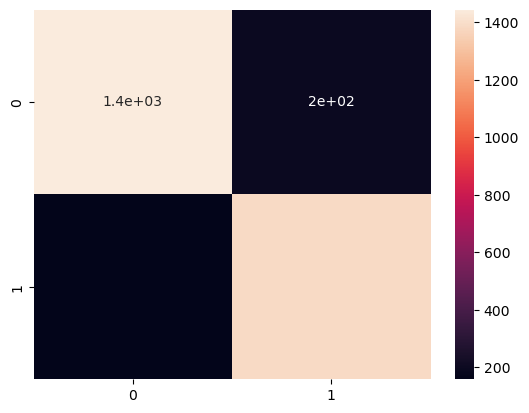

In [245]:
sns.heatmap(confusion_matrix(x_pred, y_test), annot = True)

# gradient boosting classifier after hyperparameter tuning

In [188]:
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]
}

In [189]:
random_search2 = RandomizedSearchCV(model2, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

In [190]:
random_search2.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000204B9573B90>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000204B9573090>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000204B9571850>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000204B9570050>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000204B953B310>},
                   random_state=42, scoring='accuracy')

In [191]:
random_search2.best_score_

0.9082417582417582

In [193]:
random_search2.best_params_

{'learning_rate': 0.11459979618751881,
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'n_estimators': 177}

In [195]:
random_model2 = GradientBoostingClassifier(learning_rate= 0.11459979618751881,
 max_depth= 9,
 min_samples_leaf= 1,
 min_samples_split= 9,
 n_estimators= 177)

In [196]:
random_model2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.11459979618751881, max_depth=9,
                           min_samples_split=9, n_estimators=177)

In [247]:
x_pred2 = random_model2.predict(X_test)
accuracy_score(y_test, x_pred2)

0.9127432517263026

In [198]:
y_pred = random_model2.predict(X_train)
accuracy_score(y_train, y_pred)

1.0

In [281]:
print(classification_report(x_pred2, y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1682
           1       0.89      0.93      0.91      1504

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186



In [248]:
confusion_matrix(x_pred2, y_test)

array([[1503,  179],
       [  99, 1405]], dtype=int64)

<Axes: >

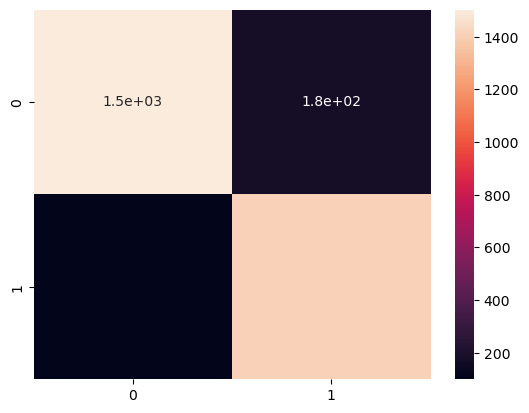

In [250]:
sns.heatmap(confusion_matrix(x_pred2, y_test), annot = True)

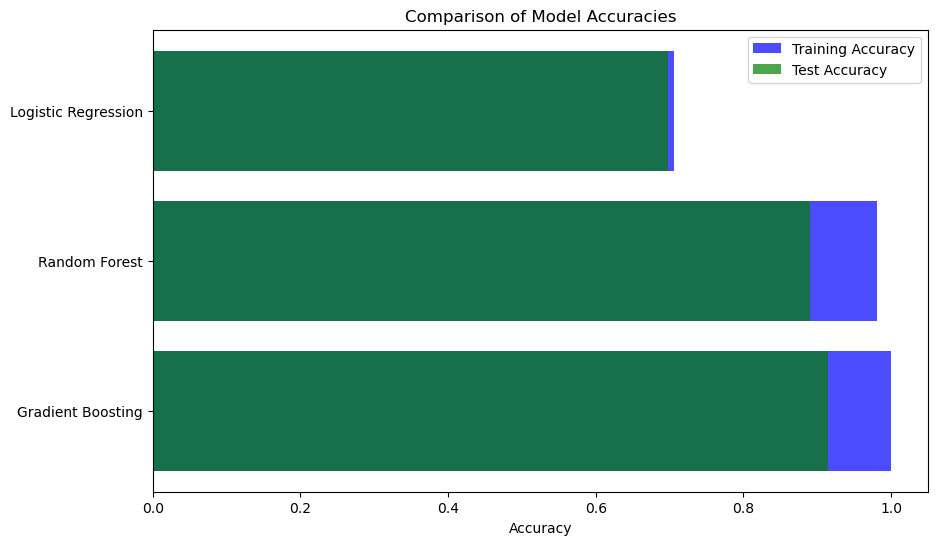

In [287]:
models = {
    'Logistic Regression': LogisticRegression(C= 0.08233797718320979, penalty= 'l2', random_state=42),
    'Random Forest': RandomForestClassifier(bootstrap= False,
 max_depth= 18,
 max_features= 'log2',
 min_samples_leaf= 2,
 min_samples_split= 11,
 n_estimators= 139, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate= 0.11459979618751881,
 max_depth= 9,
 min_samples_leaf= 1,
 min_samples_split= 9,
 n_estimators= 177, random_state=42)
}

train_scores = {}
test_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_scores[name] = train_accuracy
    
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_scores[name] = test_accuracy

plt.figure(figsize=(10, 6))
plt.barh(list(train_scores.keys()), list(train_scores.values()), color='b', alpha=0.7, label='Training Accuracy')
plt.barh(list(test_scores.keys()), list(test_scores.values()), color='g', alpha=0.7, label='Test Accuracy')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.legend()
plt.gca().invert_yaxis() 
plt.show()

In [279]:
import pickle

In [282]:
pickle.dump(scaler, open("customer_churn_scaler.pkl", "wb"))

In [283]:
pickle.dump(random_model2, open("customer_churn_model.pkl", "wb"))